<a href="https://colab.research.google.com/github/Tirta2241720045/PCVK_Ganjil_2024/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mengubah tingkat kecerahan citra
----------------------------------
Masukkan nilai kecerahan: 50


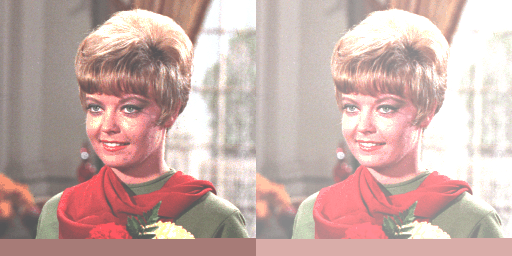

In [2]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Mengubah tingkat kecerahan citra')
print('----------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')
    brightness = 0  # Menetapkan nilai default jika input tidak valid

# Membaca gambar
original = cv.imread('/content/drive/MyDrive/female.tiff')

if original is None:
    print('Error: Gambar tidak ditemukan. Periksa path file.')
else:
    brightness_image = np.zeros(original.shape, original.dtype)

    # Mengakses per piksel untuk menambahkan kecerahan
    for y in range(original.shape[0]):
        for x in range(original.shape[1]):
            for c in range(original.shape[2]):
                brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

    # Cara sederhana tanpa for loop
    # brightness_image = cv.convertScaleAbs(original, beta=brightness)

    # Menggabungkan gambar asli dan gambar dengan kecerahan yang diubah
    final_frame = cv.hconcat((original, brightness_image))
    cv2_imshow(final_frame)


**TUGAS**

# 1. Implement image inverse in your code using formula shown in the theoretical background subsection above, giving the output shown in the following figure:


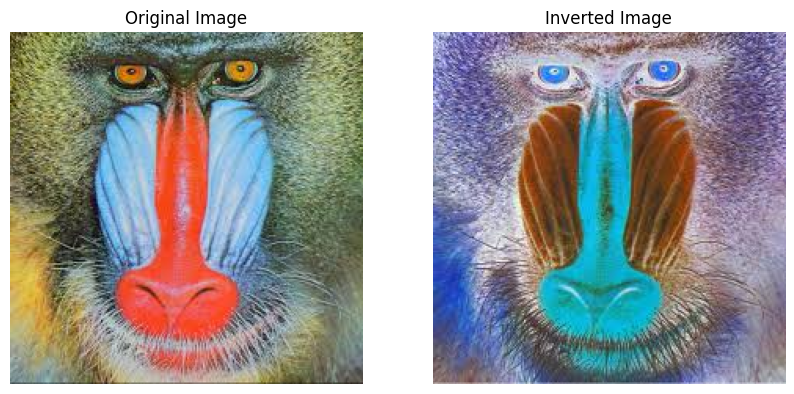

In [11]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Membaca citra
img = cv.imread('/content/drive/MyDrive/mandrill.tiff')

# Konversi BGR ke RGB agar warna terlihat benar di Matplotlib
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Melakukan inversi citra
img_inverse = 255 - img_rgb

# Menampilkan citra asli dan citra terinversi berdampingan
plt.figure(figsize=(10,5))

# Menampilkan citra asli
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

# Menampilkan citra terinversi
plt.subplot(1, 2, 2)
plt.imshow(img_inverse)
plt.title('Inverted Image')
plt.axis('off')

plt.show()


# 2. Implement contrast transformation in Google Collaboratory using the formula written in the Theoretical background section, giving the output shown in the following figure:

Mengubah kontras dan tingkat kecerahan citra
----------------------------------------------
Masukan tingkat kecerahan [-255 - 255]: 60
Masukkan kontras [1.0 - 3.0]: 1.5


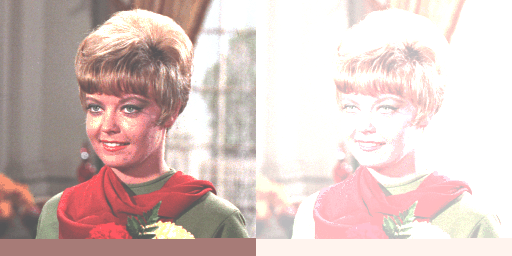

In [1]:
import cv2 as cv
import numpy as np

print('Mengubah kontras dan tingkat kecerahan citra')
print('----------------------------------------------')

try:
    brightness = int(input('Masukan tingkat kecerahan [-255 - 255]: '))
    contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
    print('Error, not a number')
    exit()

# Membaca citra
original = cv.imread('/content/drive/MyDrive/female.tiff')

# Memeriksa apakah citra berhasil dimuat
if original is None:
    print('Error: File gambar tidak ditemukan atau jalur tidak benar.')
    exit()

# Membuat citra dengan kontras yang telah diubah
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            contrast_image[y, x, c] = np.clip(contrast * original[y, x, c] + brightness, 0, 255)

# Menggabungkan citra asli dan citra yang telah diubah
final_frame = cv.hconcat([original, contrast_image])

# Menampilkan citra
from google.colab.patches import cv2_imshow
cv2_imshow(final_frame)


# 3. Implement transformation of logarithmic brightness on Google Colaboratory using the formula written in the Theoretical Background Reviews, generating output shown in the following figure:

 Mengubah tingkat kecerahan citra dengan Transformasi Log
----------------------------------------------
Masukkan nilai kecerahan:40


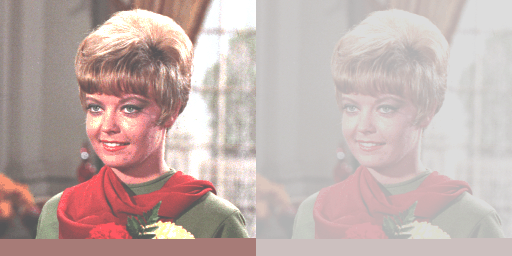

In [3]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('----------------------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*  (np.log(1 + original[y,x,c])), 0 , 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# 4. Implement grayscale transformation using the averaging, lightness, and luminance method on Google Colaboratory using the formula written in the Theoretical Background Reviews, generating output as follows :

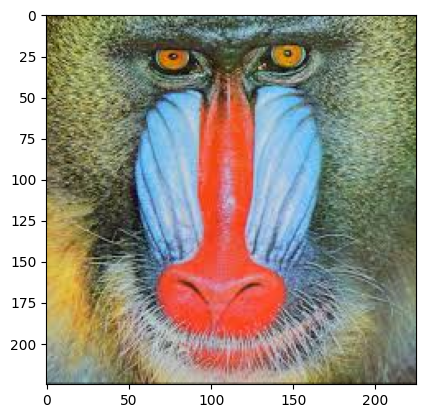

In [10]:
img = cv.imread('/content/drive/MyDrive/mandrill.tiff')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

# a. Averaging


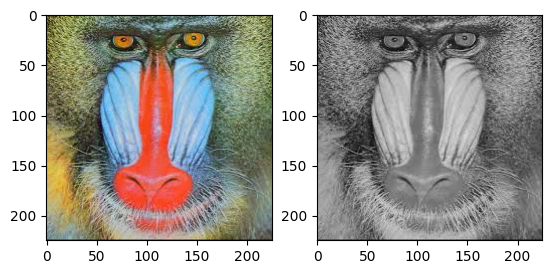

In [9]:
img_avg = cv.imread('/content/drive/MyDrive/mandrill.tiff')
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

# b. Lightness


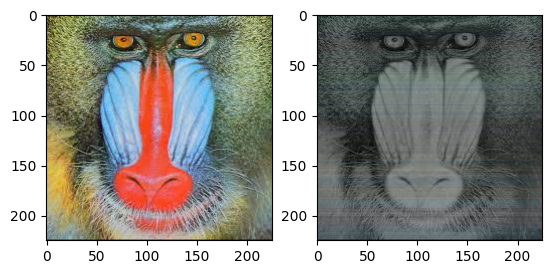

In [8]:
img_light = cv.imread('/content/drive/MyDrive/mandrill.tiff')
img_light[:] = np.max(img_light, axis=-1, keepdims=100)/2 + np.min(img_light, axis=-2, keepdims=100)/3
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_light)

# c. Luminance

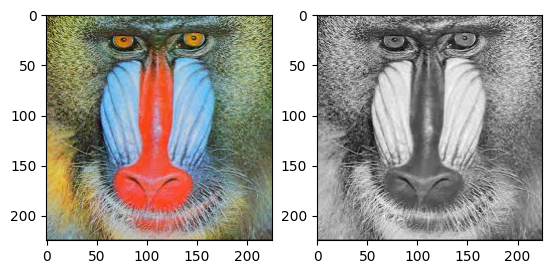

In [7]:
img_lum = cv.imread('/content/drive/MyDrive/mandrill.tiff')
R, G, B = img_lum[: , : , 0], img_lum[: , : , 1], img_lum[: , : , 2]
gray_img_lum = (0.24 * R) + (0.77 * G) + (0.06 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_img_lum, cmap = 'gray')

# 5. Show certain colors in the image, adn change other colors to grayscale. For example, show the blue color in the image input and change the parts other which is not colored blue into grayscale as in the example below:

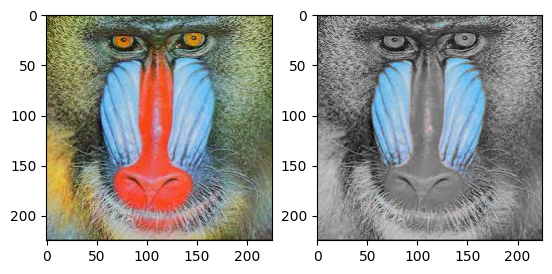

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Memuat gambar
img = cv.imread('/content/drive/MyDrive/mandrill.tiff')

# Membuat masker untuk warna biru
# Menggunakan saluran biru (saluran pertama, [:,:,0])
ret, mask = cv.threshold(img[:, :, 0], 180, 255, cv.THRESH_BINARY)

# Membuat masker tiga saluran
mask3 = np.zeros_like(img)
mask3[:, :, 0] = mask  # Saluran biru
mask3[:, :, 1] = mask  # Saluran hijau
mask3[:, :, 2] = mask  # Saluran merah

# Mengambil bagian biru dari gambar asli
blue = cv.bitwise_and(img, mask3)

# Mengubah gambar menjadi skala abu-abu
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_gray = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# Menggabungkan gambar skala abu-abu dan bagian biru
gray = cv.bitwise_and(img_gray, 255 - mask3)
out = gray + blue

# Menampilkan gambar asli dan hasilnya
fig, ax = plt.subplots(1, 2)
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(out, cv.COLOR_BGR2RGB))
plt.show()